You are a data scientist working for a healthcare company, and you have been tasked with creating a decision tree to help identify patients with diabetes based on a set of clinical variables. You have been given a dataset (diabetes.csv) with the following variables:

Pregnancies: Number of times pregnant (integer)

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)

BloodPressure: Diastolic blood pressure (mm Hg) (integer)

SkinThickness: Triceps skin fold thickness (mm) (integer)

Insulin: 2-Hour serum insulin (mu U/ml) (integer)

BMI: Body mass index (weight in kg/(height in m)^2) (float)

DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history) (float)

Age: Age in years (integer)

Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer) Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.

Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.

Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.

Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.

Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   

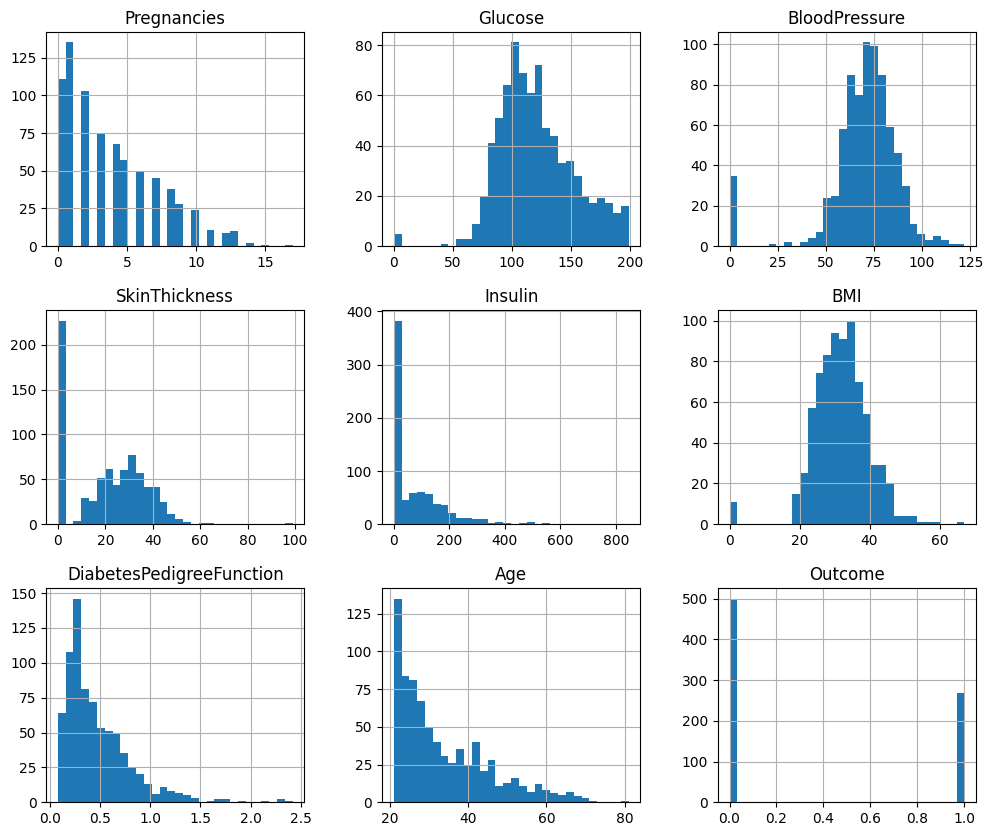

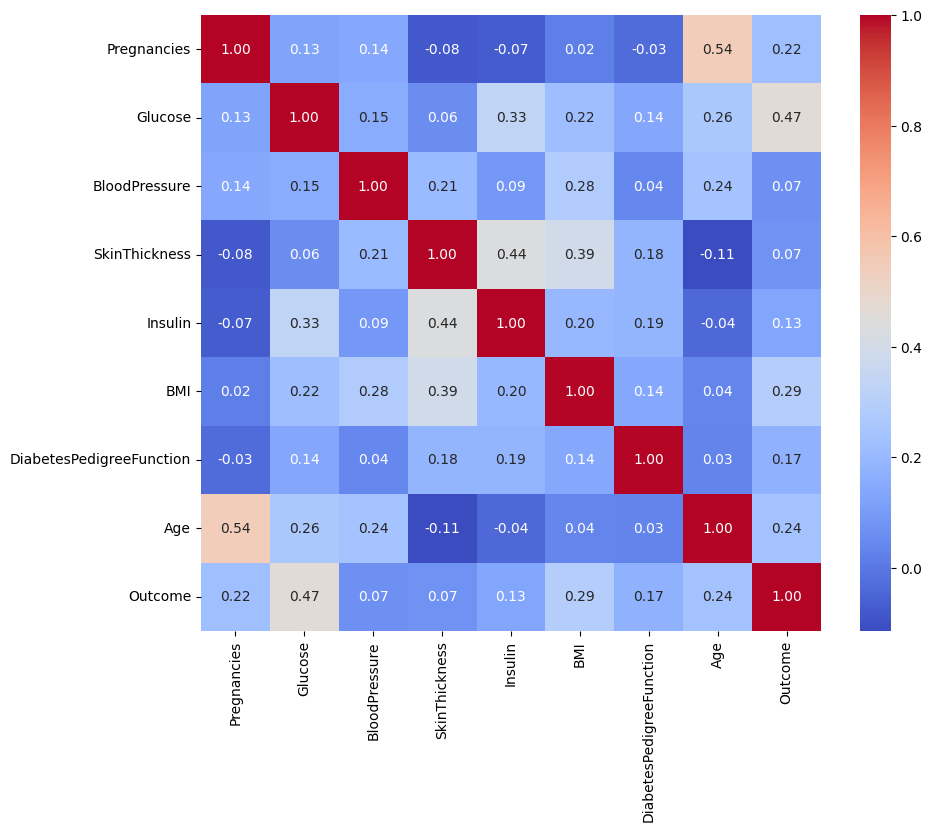

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
(636, 9)
Training set shape: (445, 8)
Test set shape: (191, 8)
Best parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best cross-validation score: 0.7685393258426967
Confusion Matrix:
 [[104  34]
 [ 22  31]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.75      0.79       138
           1       0.48      0.58      0.53        53

    accuracy                           0.71       191
   macro avg       0.65      0.67      0.66       191
weighted avg       0.73      0.71      0.72       191



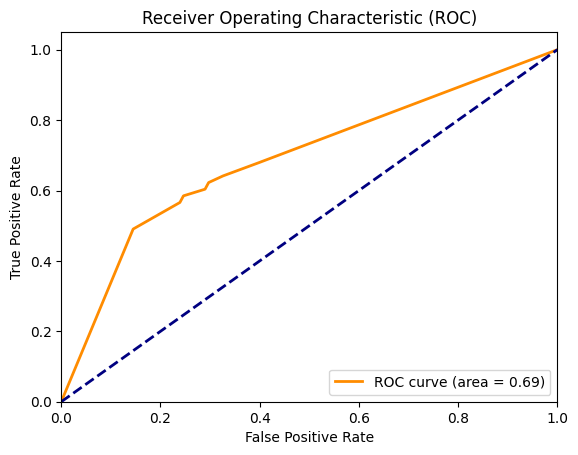

Decision Tree Rules:
 |--- Glucose <= 137.50
|   |--- Age <= 28.50
|   |   |--- Glucose <= 112.50
|   |   |   |--- SkinThickness <= 31.50
|   |   |   |   |--- class: 0
|   |   |   |--- SkinThickness >  31.50
|   |   |   |   |--- DiabetesPedigreeFunction <= 0.50
|   |   |   |   |   |--- Insulin <= 83.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Insulin >  83.00
|   |   |   |   |   |   |--- Pregnancies <= 1.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Pregnancies >  1.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- DiabetesPedigreeFunction >  0.50
|   |   |   |   |   |--- class: 1
|   |   |--- Glucose >  112.50
|   |   |   |--- DiabetesPedigreeFunction <= 0.53
|   |   |   |   |--- SkinThickness <= 6.50
|   |   |   |   |   |--- Glucose <= 123.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Glucose >  123.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- SkinThickness >  6.50
|   |   |   |   |

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Q1. Import the dataset and examine the variables
df = pd.read_csv('/content/diabetes (2).csv')

# Display the first few rows of the dataset
print(df.head())

# Display basic descriptive statistics
print(df.describe())

# Visualize the distribution of each variable
df.hist(bins=30, figsize=(12, 10), layout=(3, 3))
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

# Q2. Preprocess the data
# Check for missing values
print(df.isnull().sum())

# Replace missing values with the median of the respective column
df.fillna(df.median(), inplace=True)

# Detect and remove outliers using IQR (Interquartile Range)
from scipy.stats import iqr

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for column in df.columns[:-1]:  # Exclude 'Outcome'
    df = remove_outliers(df, column)

# Check the shape of the cleaned dataset
print(df.shape)

# Q3. Split the dataset into a training set and a test set
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f'Training set shape: {X_train.shape}')
print(f'Test set shape: {X_test.shape}')

# Q4. Train a Decision Tree model
clf = DecisionTreeClassifier(random_state=42)

# Define hyperparameters for tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search with Cross-Validation
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best cross-validation score: {grid_search.best_score_}')

# Train the model with best parameters
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)

# Q5. Evaluate the model
# Predict on the test set
y_pred = best_clf.predict(X_test)
y_proba = best_clf.predict_proba(X_test)[:, 1]

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Q6. Interpret the Decision Tree
tree_rules = export_text(best_clf, feature_names=list(X.columns))
print("Decision Tree Rules:\n", tree_rules)

# Q7. Validate the model
# Sensitivity Analysis: Add noise to the features
X_train_noisy = X_train.copy()
X_train_noisy += np.random.normal(0, 0.1, X_train.shape)

# Retrain the model with noisy data
best_clf_noisy = grid_search.best_estimator_
best_clf_noisy.fit(X_train_noisy, y_train)

# Evaluate the model with noisy data
y_pred_noisy = best_clf_noisy.predict(X_test)
print("Classification Report with Noisy Data:\n", classification_report(y_test, y_pred_noisy))
